# **Introducción**

La empresa **TELECOM X** enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.


El desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

 # **Limpieza y Tratamiento de Datos**

## **Importación de bibliotecas**

In [1]:
import pandas as pd #Para el manejo de la bases de datos y operaciones de la misma
import matplotlib.pyplot as plt # Para realizar graficos
import seaborn as sns #Para realizar graficos
import requests #Para el uso de la API
import json #Para el manejo de archivos json

##**Extracción**

A continuación se adjunta la API con la bases de datos y su extracción.

In [2]:
url='https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

try:
    response = requests.get(url)
    response.raise_for_status()  # Lanza error si la petición falló
    data = json.loads(response.text)
except requests.exceptions.RequestException as e:
    print(f"Error fetching data: {e}")
except json.JSONDecodeError as e:
    print(f"Error decoding JSON: {e}")
else:
    print("Successfully conection")

Successfully conection


Obtener el Data Frame

In [3]:
try:
  df=pd.DataFrame(data)
except Exception as e:
  print(f'Error creating DataFrame {e}')
else:
  print('Successfully created DataFrame')

Successfully created DataFrame


## Transformación

Debido a que los valores de "df" no muestra las columnas completas se tiene que normalizar.

In [4]:
# Normalizar cada columna individualmente
customer_norm = pd.json_normalize(df['customer'])
phone_norm = pd.json_normalize(df['phone'])
internet_norm = pd.json_normalize(df['internet'])
account_norm = pd.json_normalize(df['account'])

# Combinar los resultados
df = pd.concat([
    df.drop(['customer', 'phone', 'internet', 'account'], axis=1), #Eliminar los valores que no se usaran más
    customer_norm,
    phone_norm,
    internet_norm,
    account_norm
], axis=1)


### **Verificación de existencia valores nulos**


In [5]:
 #Verificar si hay valores nulos
if df.isnull().sum().any():
    print(f"There are NULLs in DataFrame: {df.isnull().sum()}")
else:
    print("There are not NULLS in DataFrame.")

There are not NULLS in DataFrame.


### **Verificación de existencia valores duplicados**


In [6]:
duplicate_rows = df.duplicated().sum()
if duplicate_rows > 0:
    print(f"\n[DUPLICATES FOUND] Total duplicate rows: {duplicate_rows}")
    print("Sample of duplicate rows:")
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("\n[NO DUPLICATES FOUND] Data is unique.")


[NO DUPLICATES FOUND] Data is unique.


### **Observar los tipos de datos del Dataframe**

In [7]:
print("\n[DATA TYPES SUMMARY]")
print(df.dtypes.to_string())


[DATA TYPES SUMMARY]
customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object


### **Valores presentes en el Dataframe**

In [8]:
# 4. Categorical Values Analysis
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
if not categorical_cols.empty:
    print("\n[CATEGORICAL VALUES ANALYSIS]")
    for col in categorical_cols:
        unique_count = df[col].nunique()
        print(f"Column '{col}': {unique_count} unique values")
        if unique_count < 20:  # Show values if not too many
            print(f"Values: {df[col].unique()}")


[CATEGORICAL VALUES ANALYSIS]
Column 'customerID': 7267 unique values
Column 'Churn': 3 unique values
Values: ['No' 'Yes' '']
Column 'gender': 2 unique values
Values: ['Female' 'Male']
Column 'Partner': 2 unique values
Values: ['Yes' 'No']
Column 'Dependents': 2 unique values
Values: ['Yes' 'No']
Column 'PhoneService': 2 unique values
Values: ['Yes' 'No']
Column 'MultipleLines': 3 unique values
Values: ['No' 'Yes' 'No phone service']
Column 'InternetService': 3 unique values
Values: ['DSL' 'Fiber optic' 'No']
Column 'OnlineSecurity': 3 unique values
Values: ['No' 'Yes' 'No internet service']
Column 'OnlineBackup': 3 unique values
Values: ['Yes' 'No' 'No internet service']
Column 'DeviceProtection': 3 unique values
Values: ['No' 'Yes' 'No internet service']
Column 'TechSupport': 3 unique values
Values: ['Yes' 'No' 'No internet service']
Column 'StreamingTV': 3 unique values
Values: ['Yes' 'No' 'No internet service']
Column 'StreamingMovies': 3 unique values
Values: ['No' 'Yes' 'No inte

Se puede observar que los valores en su mayoría son "Yes" y "No", e igualmente otros valores con alfanumericos, por tanto se tendrá que cambiar para el mejor manejo del data frame.

### **Eliminación y modificación de los datos**

In [9]:
df[df["Churn"]=='']

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


Valores como: '', se eliminan en debido a que no existe un valor claro y si se modifican se podria alterar los resultados del analisis.

In [10]:
# Eliminar filas donde 'Churn' es string vacío
df = df[df['Churn'] != ''].reset_index(drop=True)

Los valores en donde se puede deducir un enfasís negativo se cambian a "No".

In [11]:
# Remplazar valores negativos como 'No'
service_columns = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in service_columns:
    df[col] = df[col].replace('No internet service', 'No')
    df[col] = df[col].replace('No phone service', 'No')

In [12]:
df.sample(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
1521,2232-DMLXU,Yes,Female,0,Yes,No,1,Yes,No,DSL,...,No,No,No,Yes,No,Month-to-month,No,Mailed check,55.20,55.2
6450,9134-CEQMF,Yes,Male,1,Yes,No,7,Yes,No,Fiber optic,...,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,89.50,676.7
3770,5307-UVGNB,No,Female,0,Yes,Yes,53,No,No,DSL,...,Yes,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),48.70,2495.2
4542,6402-SSEJG,No,Female,0,No,No,25,No,No,DSL,...,Yes,Yes,No,Yes,Yes,One year,No,Electronic check,61.05,1540.2
6158,8722-PRFDV,No,Female,0,Yes,Yes,71,Yes,No,DSL,...,No,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),77.55,5574.35


ELiminar la columna costumerID, ya que es irrelevante en el estudio.

In [13]:
df.drop('customerID', axis=1, inplace=True)

Verificar valores no tengan: ' '.


In [14]:
col=df.columns
col
df[df[col]==' '].count()

,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Eliminar valores ' ' de Charges.total.

In [15]:
df = df[df['Charges.Total'] != ' '].reset_index(drop=True)
df[df[col]==' '].count()

,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [16]:
df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


#### **Cambio de los tipos de datos**

Convertir valores a booleanos.


In [18]:
yes_no_cols = [
    'Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in yes_no_cols:
    df[col] = df[col] == 'Yes'  # Convierte "Yes" a True, otros valores a False

#Convertir a valores booleanos la columna SeniorCitizen
df['SeniorCitizen'] = df['SeniorCitizen'] == 1

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   bool   
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   bool   
 3   Partner           7032 non-null   bool   
 4   Dependents        7032 non-null   bool   
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   bool   
 7   MultipleLines     7032 non-null   bool   
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   bool   
 10  OnlineBackup      7032 non-null   bool   
 11  DeviceProtection  7032 non-null   bool   
 12  TechSupport       7032 non-null   bool   
 13  StreamingTV       7032 non-null   bool   
 14  StreamingMovies   7032 non-null   bool   
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   bool   


Cambiar la columna "Charges.Total" a float.

In [19]:
df['Charges.Total']=df['Charges.Total'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   bool   
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   bool   
 3   Partner           7032 non-null   bool   
 4   Dependents        7032 non-null   bool   
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   bool   
 7   MultipleLines     7032 non-null   bool   
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   bool   
 10  OnlineBackup      7032 non-null   bool   
 11  DeviceProtection  7032 non-null   bool   
 12  TechSupport       7032 non-null   bool   
 13  StreamingTV       7032 non-null   bool   
 14  StreamingMovies   7032 non-null   bool   
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   bool   


### **Columna de cargos diarios**

In [20]:
# Calcular la nueva columna de cargos diarios
df['Daily_Billing'] = (df['Charges.Monthly'] / 30).round(2)

### **Cambiar nombre a las Columnas**
Con el fin de tener mas claridad.

In [21]:
#Cambiar los nombres a las columnas para mayor legibilidad

column_renames = {
    'Churn': 'Churned',
    'gender': 'Gender',
    'SeniorCitizen': 'Is_Senior',
    'Partner': 'Has_Partner',
    'Dependents': 'Has_Dependents',
    'tenure': 'Tenure_Months',
    'PhoneService': 'Has_Phone_Service',
    'MultipleLines': 'Has_Multiple_Lines',
    'InternetService': 'Internet_Service_Type',
    'OnlineSecurity': 'Has_Online_Security',
    'OnlineBackup': 'Has_Online_Backup',
    'DeviceProtection': 'Has_Device_Protection',
    'TechSupport': 'Has_Tech_Support',
    'StreamingTV': 'Has_Streaming_TV',
    'StreamingMovies': 'Has_Streaming_Movies',
    'Contract': 'Contract_Type',
    'PaperlessBilling': 'Uses_Paperless_Billing',
    'PaymentMethod': 'Payment_Method',
    'Charges.Monthly': 'Monthly_Charges',
    'Charges.Total': 'Total_Charges',
    'Cuentas_Diarias': 'Daily_Charges'
}

df = df.rename(columns=column_renames)
df.head(2)

,Churned,Gender,Is_Senior,Has_Partner,Has_Dependents,Tenure_Months,Has_Phone_Service,Has_Multiple_Lines,Internet_Service_Type,Has_Online_Security,...,Has_Device_Protection,Has_Tech_Support,Has_Streaming_TV,Has_Streaming_Movies,Contract_Type,Uses_Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Daily_Billing
0,False,Female,False,True,True,9,True,False,DSL,False,...,False,True,True,False,One year,True,Mailed check,65.6,593.3,2.19
1,False,Male,False,False,False,9,True,True,DSL,False,...,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.4,2.00


#**Análisis Exploratorio de Datos**

### **Valores estadisticos básicos**
Obtener una descripción de los valores numéricos.

In [22]:
# Análisis Descriptivo
col_number = ['Churned', 'Daily_Billing', 'Has_Dependents', 'Has_Device_Protection',
       'Has_Multiple_Lines', 'Has_Online_Backup', 'Has_Online_Security',
       'Has_Partner', 'Has_Phone_Service', 'Has_Streaming_Movies',
       'Has_Streaming_TV', 'Has_Tech_Support', 'Is_Senior', 'Monthly_Charges',
       'Tenure_Months', 'Total_Charges', 'Uses_Paperless_Billing']

df[col_number].describe()


,Daily_Billing,Monthly_Charges,Tenure_Months,Total_Charges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,2.159891,64.798208,32.421786,2283.300441
std,1.002955,30.085974,24.545260,2266.771362
min,0.610000,18.250000,1.000000,18.800000
25%,1.187500,35.587500,9.000000,401.450000
50%,2.340000,70.350000,29.000000,1397.475000
75%,2.992500,89.862500,55.000000,3794.737500
max,3.960000,118.750000,72.000000,8684.800000


Obtener una descripción de los valores alfanuméricos.



In [23]:
col_text=['Gender', 'Internet_Service_Type', 'Contract_Type', 'Payment_Method']
df[col_text].describe()

,Gender,Internet_Service_Type,Contract_Type,Payment_Method
count,7032,7032,7032,7032
unique,2,3,3,4
top,Male,Fiber optic,Month-to-month,Electronic check
freq,3549,3096,3875,2365


### **Conteo de la cantidad de "Churns"**

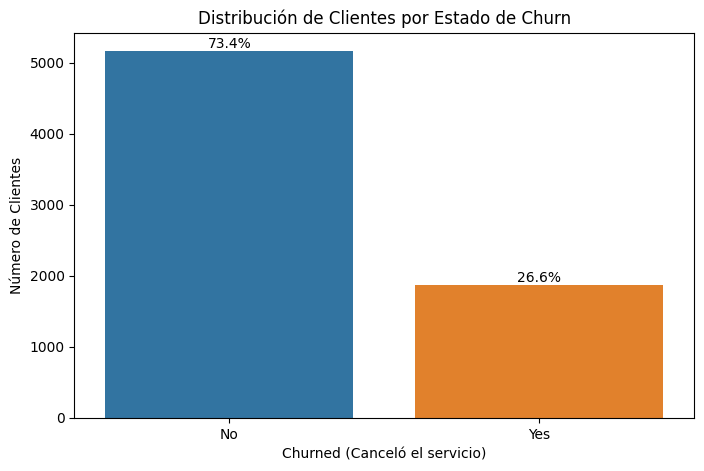

In [24]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Churned',hue='Churned', palette=['#1f77b4', '#ff7f0e'], legend=False)

# Añadir porcentajes
total = len(df)
for p in ax.patches:
    percentage = 100 * p.get_height()/total
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribución de Clientes por Estado de Churn')
plt.xlabel('Churned (Canceló el servicio)')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Se puede observar que hay un 26.6% de cancelaciones, siendo esta una cifra preocupante para la empresa. Se buscará las razones y dar recomendaciones para mejorar en dicho aspecto.

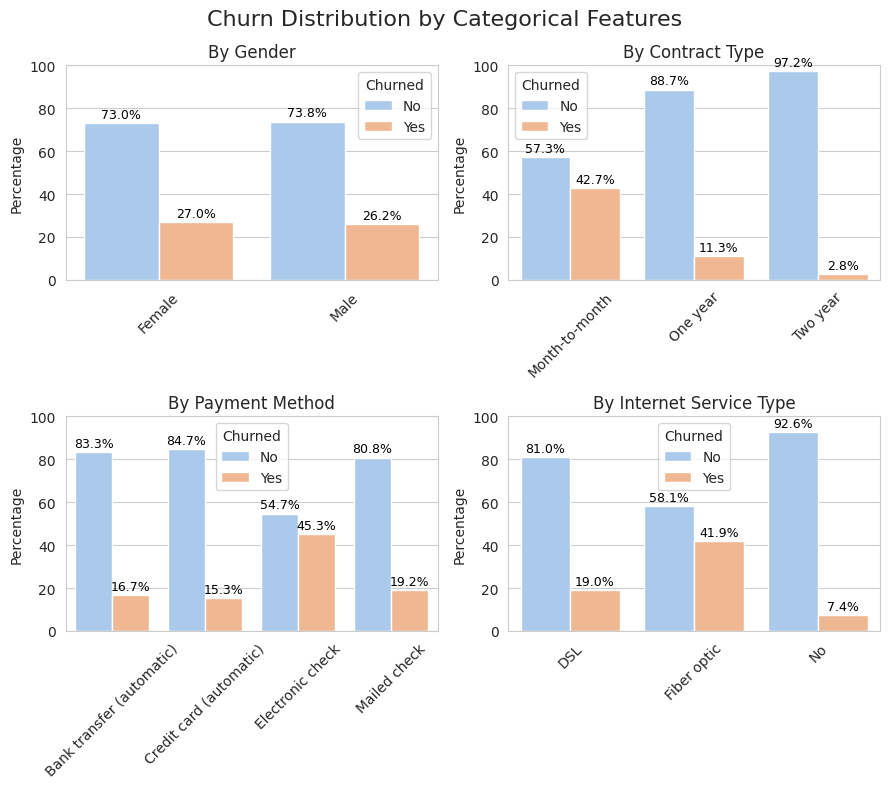

In [25]:
#Estilo
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Categorias a analizar
cat_features = ['Gender', 'Contract_Type', 'Payment_Method', 'Internet_Service_Type']

fig, axs = plt.subplots(2, 2, figsize=(9, 8))
fig.suptitle('Churn Distribution by Categorical Features', fontsize=16)

for ax in axs.flat:
    ax.set_ylim(0, 100)

for i, ax in enumerate(axs.flat):
    plot_data = (df.groupby(cat_features[i])['Churned']
                 .value_counts(normalize=True)
                 .mul(100)
                 .rename('Percentage')
                 .reset_index())

    barplot=sns.barplot(data=plot_data, x=cat_features[i], y='Percentage', hue='Churned', ax=ax)
    # Costumizar legend labels

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['No', 'Yes'], title='Churned')

    ax.set_title(f'By {cat_features[i].replace("_", " ")}')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=45)

        # Añadir etiquetas de porcentaje encima de cada barra
    for p in barplot.patches:
        if p.get_height() > 0:  # Solo mostrar si el valor es mayor a 0
            ax.text(x=p.get_x() + p.get_width()/2.,  # Centro de la barra
                   y=p.get_height() + 1,           # Altura + 1% de espacio
                   s=f'{p.get_height():.1f}%',     # Texto con formato
                   ha='center',                    # Alineación horizontal centrada
                   va='bottom',                    # Alineación vertical en la base
                   fontsize=9,
                   color='black')


plt.tight_layout()
plt.show()

**Hallazgos clave:**


1.   **Por Género:**

Diferencias mínimas: Mujeres **(26.2% churn)** vs Hombres **(27.0% churn)**

El género no es un factor determinante en el abandono

Insight: No es necesario diseñar estrategias diferenciadas por género

2.   **Por tipo de contrato (Dato más relevante)**

Contratos mensuales tienen **42.7%** de churn **(alto riesgo)**

Contratos de 1 año: **11.3% churn**

Contratos de 2 años: solo **2.8% churn** **(los más estables)**

Insight: La fidelización con contratos largos reduce drásticamente el abandono

3. **Por Método de Pago:**

Cheques electrónicos: **16.7%** churn **(el más alto)**

Pagos automáticos (tarjeta/transferencia): **~15%** churn

Mailed check: solo **7.4%** churn

Insight: Los procesos manuales de pago aumentan el riesgo de abandono

4. **Por tipo de internet:**

Fibra óptica: **41.9%** churn (extremadamente alto)

DSL: **19.0%** churn

Sin internet: solo **7.4%** churn

**Insight: Problemas graves con el servicio de fibra óptica (calidad/precio/satisfacción)**

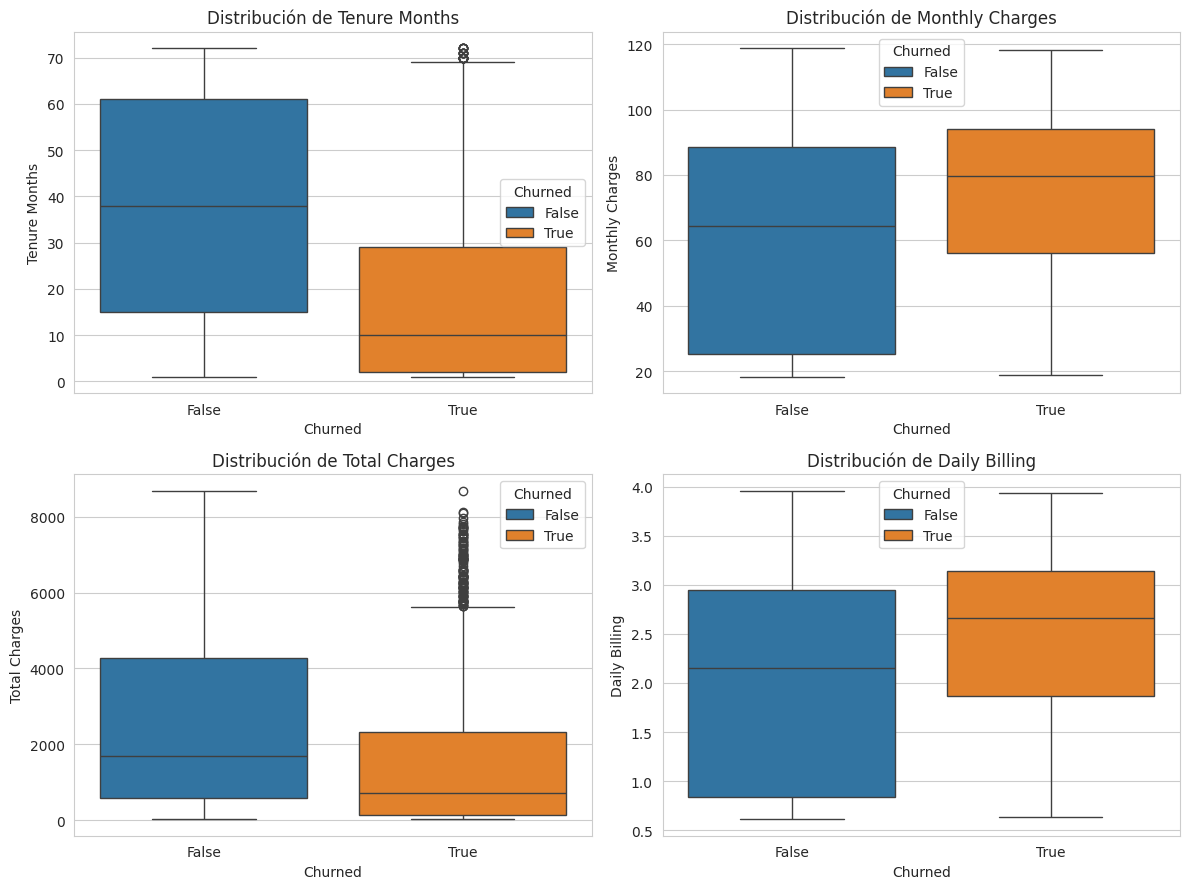

In [26]:
# Seleccionar variables numéricas clave
num_features = ['Tenure_Months', 'Monthly_Charges', 'Total_Charges', 'Daily_Billing']

plt.figure(figsize=(12, 9))

for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='Churned', hue='Churned', y=feature, palette=['#1f77b4', '#ff7f0e'])
    plt.title(f'Distribución de {feature.replace("_", " ")}')
    plt.xlabel('Churned')
    plt.ylabel(feature.replace("_", " "))

plt.tight_layout()
plt.show()

**Hallazgos clave:**


1.   **Tenure Months (Meses como cliente):**

*Clientes que se quedan (False)*: Distribución equilibrada con muchos clientes en todos los rangos (0-72 meses)

*Clientes que abandonan (True)*: Gran concentración en los primeros 10 meses. Muy pocos casos después de 40 meses

**Insight: La probabilidad de abandono es máxima en los primeros meses y disminuye drásticamente con el tiempo**

2.   **Monthly Charges (Cargos mensuales)**

*Clientes que se quedan:* Distribución bimodal con picos alrededor de $20-$40 y $80-$100

*Clientes que abandonan:* Mayor concentración en el rango de $70-$110

**Insight: Los planes más caros tienen mayor tasa de abandono**

3. **Total Charges (Cargos totales):**

*Clientes que se quedan:* Amplia distribución desde $0 hasta $8,000. Mayor concentración entre $1,000-$4,000

*Clientes que abandonan:* Concentración en cargos bajos (menos de $2,000)

**Insight: Los clientes más estables pagan más en total al contrario con los menos estables**

4. **Daily Billing (Facturación diaria)**

Patrón similar a Monthly Charges: Los que abandonan tienden a valores más altos (> $2.5 diarios) y distribución bimodal para los que permanecen


El siguiente grafico puede ser más claro en todo lo anterior:



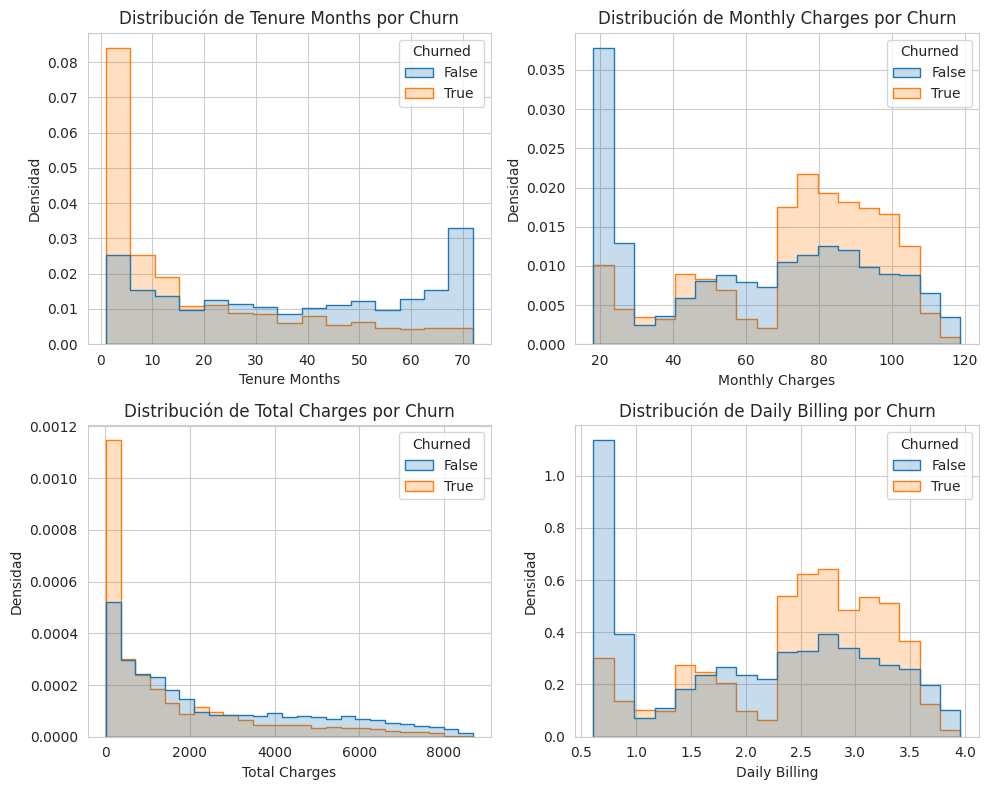

In [27]:
plt.figure(figsize=(10, 8))

for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=feature, hue='Churned',
                 element='step', stat='density',
                 common_norm=False, palette=['#1f77b4', '#ff7f0e'])
    plt.title(f'Distribución de {feature.replace("_", " ")} por Churn')
    plt.xlabel(feature.replace("_", " "))
    plt.ylabel('Densidad')

plt.tight_layout()
plt.show()

# **Análisis de correlación entre variables**

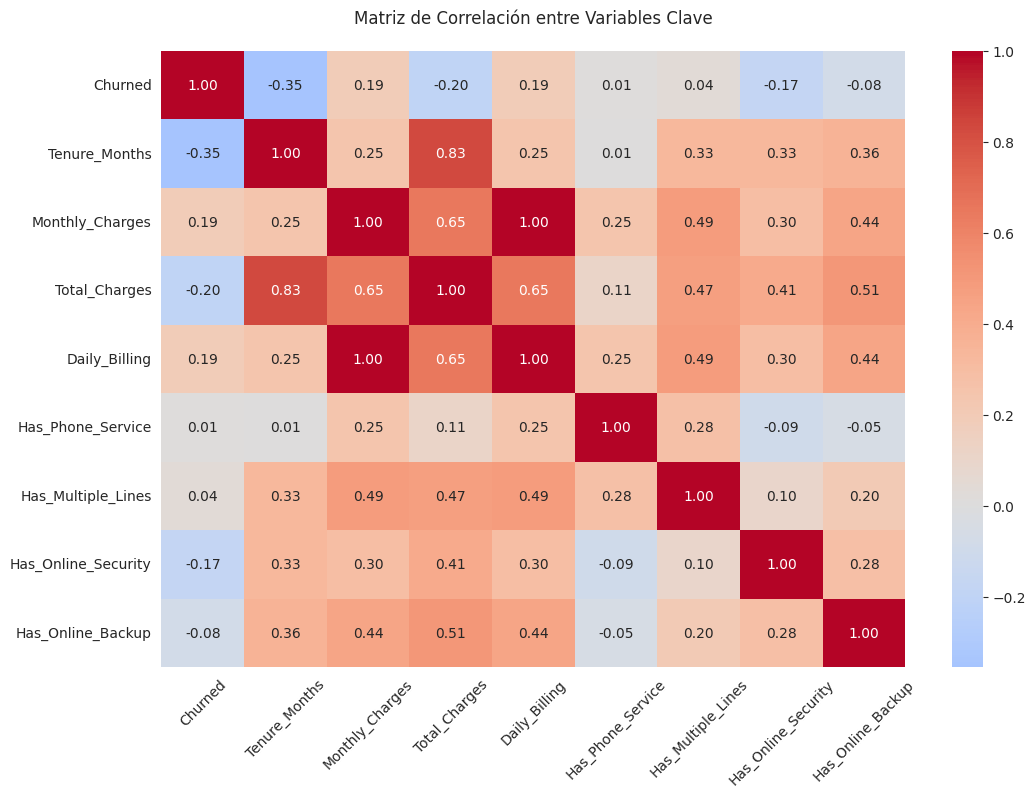

In [28]:
corr_df = df.copy()
bool_cols = ['Has_Phone_Service', 'Has_Multiple_Lines',
             'Has_Online_Security', 'Has_Online_Backup']
corr_df[bool_cols] = corr_df[bool_cols].astype(int)

# Seleccionar variables relevantes
corr_vars = ['Churned', 'Tenure_Months', 'Monthly_Charges', 'Total_Charges',
             'Daily_Billing', 'Has_Phone_Service', 'Has_Multiple_Lines',
             'Has_Online_Security', 'Has_Online_Backup']

plt.figure(figsize=(12, 8))
corr_matrix = corr_df[corr_vars].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Matriz de Correlación entre Variables Clave', pad=20)
plt.xticks(rotation=45)
plt.show()

**Hallazgos clave:**

1. **Relación con Churn (Abandono):**

*Correlación negativa fuerte*:  
- **Tenure_Months (-0.35)**: A mayor tiempo como cliente, menor probabilidad de abandono  

*Correlación positiva moderada*:  
- **Monthly_Charges (0.19)**: Cargos mensuales altos aumentan riesgo de churn  
- **Daily_Billing (0.19)**: Similar a Monthly_Charges (son variables redundantes)  

*Correlación negativa débil*:  
- **Has_Online_Security (-0.17)**: El servicio reduce muy levemente el abandono  

2. **Relaciones entre variables predictoras:**

*Correlaciones muy fuertes (>0.8)*:  
- **Tenure_Months ↔ Total_Charges (0.83)**: A más antigüedad, mayor gasto acumulado  
- **Monthly_Charges ↔ Daily_Billing (1.00)**: Sucede parecido al anterior

*Correlaciones moderadas (0.3-0.7)*:  
- **Total_Charges ↔ Has_Online_Backup (0.51)**: Clientes con backup tienden a mayor gasto  
- **Monthly_Charges ↔ Has_Multiple_Lines (0.49)**: Líneas múltiples aumentan cargos  

3. **Variables irrelevantes para Churn:**  
- **Has_Phone_Service (0.01)**: Prácticamente no influye  
- **Has_Multiple_Lines (0.04)**: Impacto mínimo  

# **Conclusiones e Insights**

## **Resumen General**
Se observa una tasa de churn del **26.6%**, lo que representa una pérdida significativa de clientes. El análisis revela patrones claros en las cancelaciones, destacando factores críticos como el **tipo de contrato**, **método de pago**, **servicio de internet** y **antigüedad del cliente**.  

### **Insights Clave por Categorías**  

#### **1. Tipo de Contrato (Factor Más Crítico)**  
- **Contratos mensuales** tienen una tasa de churn del **42.7%** (alto riesgo).  
- **Contratos anuales** reducen el churn a **11.3%**.  
- **Contratos de 2 años** tienen solo **2.8%** de churn.  
🔹 *Insight*: **Los clientes con compromisos a largo plazo son más estables.**  

#### **2. Método de Pago**  
- **Cheques electrónicos** tienen el mayor churn (**16.7%**).  
- **Pagos automáticos** (tarjeta/transferencia) reducen el churn a **~15%**.  
- **Mailed check** tiene el menor churn (**7.4%**).  
🔹 *Insight*: **Los pagos manuales (cheques electrónicos) aumentan el riesgo de abandono.**  

#### **3. Servicio de Internet**  
- **Fibra óptica** tiene una tasa de churn alarmante (**41.9%**).  
- **DSL** tiene **19%** de churn.  
- **Clientes sin internet** tienen solo **7.4%** de churn.  
🔹 *Insight*: **Posibles problemas con la fibra óptica (calidad, precio o soporte técnico).**  

#### **4. Antigüedad del Cliente (Tenure_Months)**  
- **Mayor churn en los primeros 10 meses** (alta deserción inicial).  
- **Clientes con más de 40 meses** raramente abandonan.  
🔹 *Insight*: **La fidelización mejora con el tiempo; los primeros meses son críticos.**  

#### **5. Facturación (Monthly_Charges y Total_Charges)**  
- **Cargos mensuales altos** (>$70) correlacionan con mayor churn.  
- **Clientes con más gasto acumulado (Total_Charges) son más leales.**  
🔹 *Insight*: **Los planes caros tienen mayor riesgo, pero los clientes que permanecen generan más valor.**  


# **Recomendaciones**


**1. Reducir el Churn reduciendo Contratos Mensuales**  
✅ **Incentivar contratos anuales/2 años**:  
   - Descuentos en pagos anuales.  
   - Beneficios exclusivos (soporte prioritario, servicios extra).  

**2. Optimizar Métodos de Pago**  
✅ **Promover pagos automáticos y "Mailed Check"**:  
   - Ofrecer un **descuento de aproximadamente 5%** por usar tarjeta/transferencia automática.  
   - Simplificar el proceso de pago electrónico.  

**3. Mejorar el Servicio de Fibra Óptica**  
✅ **Investigación de causas del alto churn**:  
   - Encuestas a clientes que cancelan (¿problemas de velocidad? ¿soporte técnico?).  
   - Revisión de precios competitivos.  

**4. Programa de Retención para Nuevos Clientes**  
✅ **"Primeros 6 meses protegidos"**:  
   - Soporte 24/7 dedicado.  
   - Bonificación al cumplir 6 meses (ej: mes gratis).  

**5. Estrategias para Planes Caros**  
✅ **Paquetes premium con valor agregado**:  
   - Incluir servicios extra (backup en la nube, seguridad avanzada).  
   - Programa de recompensas por lealtad.  

# **Conclusión final**
El análisis revela que **el tipo de contrato, el método de pago y la calidad del servicio de internet** son los factores más influyentes en el churn. Implementar estrategias de **fidelización temprana, pagos automatizados y mejora en la fibra óptica** puede reducir significativamente las cancelaciones.  

